## Import the relevant Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Application Data

## Load the Data

In [2]:
data1 = pd.read_csv("application_data.csv")
data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Number of Rows and Columns

In [3]:
data1.shape

(307511, 122)

## Data Cleaning

### Checking for missing values

In [4]:
data1.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

### Dealing with missing values

In [5]:
for i in data1.columns:
    if data1[i].isna().sum()>1:
        if (data1[i].isna().sum()/data1.shape[0]*100)<5:
            data1.dropna(subset=[i], axis=0, inplace = True)            

Removing missing data from these columns:
- AMT_ANNUITY
- AMT_GOODS_PRICE
- NAME_TYPE_SUITE
- EXT_SOURCE_2
- OBS_30_CNT_SOCIAL_CIRCLE
- DEF_30_CNT_SOCIAL_CIRCLE
- OBS_60_CNT_SOCIAL_CIRCLE
- DEF_60_CNT_SOCIAL_CIRCLE

In [6]:
for i in data1.columns:
    if (data1[i].isnull().sum()/data1.shape[0])*100>50:
        data1.drop(columns=[i], inplace=True)        

Removing columns that have more the 50% missing data:
- OWN_CAR_AGE
- EXT_SOURCE_1
- APARTMENTS_AVG
- BASEMENTAREA_AVG
- YEARS_BUILD_AVG
- COMMONAREA_AVG
- ELEVATORS_AVG
- ENTRANCES_AVG
- FLOORSMIN_AVG
- LANDAREA_AVG
- LIVINGAPARTMENTS_AVG
- LIVINGAREA_AVG
- NONLIVINGAPARTMENTS_AVG
- NONLIVINGAREA_AVG
- APARTMENTS_MODE
- BASEMENTAREA_MODE
- YEARS_BUILD_MODE
- COMMONAREA_MODE
- ELEVATORS_MODE
- ENTRANCES_MODE
- FLOORSMIN_MODE
- LANDAREA_MODE
- LIVINGAPARTMENTS_MODE
- LIVINGAREA_MODE
- NONLIVINGAPARTMENTS_MODE
- NONLIVINGAREA_MODE
- APARTMENTS_MEDI
- BASEMENTAREA_MEDI
- YEARS_BUILD_MEDI
- COMMONAREA_MEDI
- ELEVATORS_MEDI
- ENTRANCES_MEDI
- FLOORSMIN_MEDI
- LANDAREA_MEDI
- LIVINGAPARTMENTS_MEDI
- LIVINGAREA_MEDI
- NONLIVINGAPARTMENTS_MEDI
- NONLIVINGAREA_MEDI
- FONDKAPREMONT_MODE
- HOUSETYPE_MODE
- WALLSMATERIAL_MODE

In [7]:
# Replacing the 'XNA' values with 'F'

data1.loc[(35657,38566,83382,189640), "CODE_GENDER"] = "F"

In [8]:
# Replacing the missing data with Mode

mod = ["OCCUPATION_TYPE", "TOTALAREA_MODE", "EMERGENCYSTATE_MODE"]

for i in mod:
    data1[i].fillna(data1[i].mode()[0], inplace=True)

Replacing the null values with mode in these columns:
- OCCUPATION_TYPE
- TOTALAREA_MODE
- EMERGENCYSTATE_MODE

In [9]:
# Replacing the missing data with Median

for i in data1:
    if data1[i].isna().sum()>0:
        data1[i].fillna(data1[i].median(), inplace=True)

Replacing the null values with median in these columns:
- EXT_SOURCE_3
- YEARS_BEGINEXPLUATATION_AVG
- FLOORSMAX_AVG
- YEARS_BEGINEXPLUATATION_MODE
- FLOORSMAX_MODE
- YEARS_BEGINEXPLUATATION_MEDI
- FLOORSMAX_MEDI
- AMT_REQ_CREDIT_BUREAU_HOUR
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_WEEK
- AMT_REQ_CREDIT_BUREAU_MON
- AMT_REQ_CREDIT_BUREAU_QRT
- AMT_REQ_CREDIT_BUREAU_YEAR

## Detecting Outliers

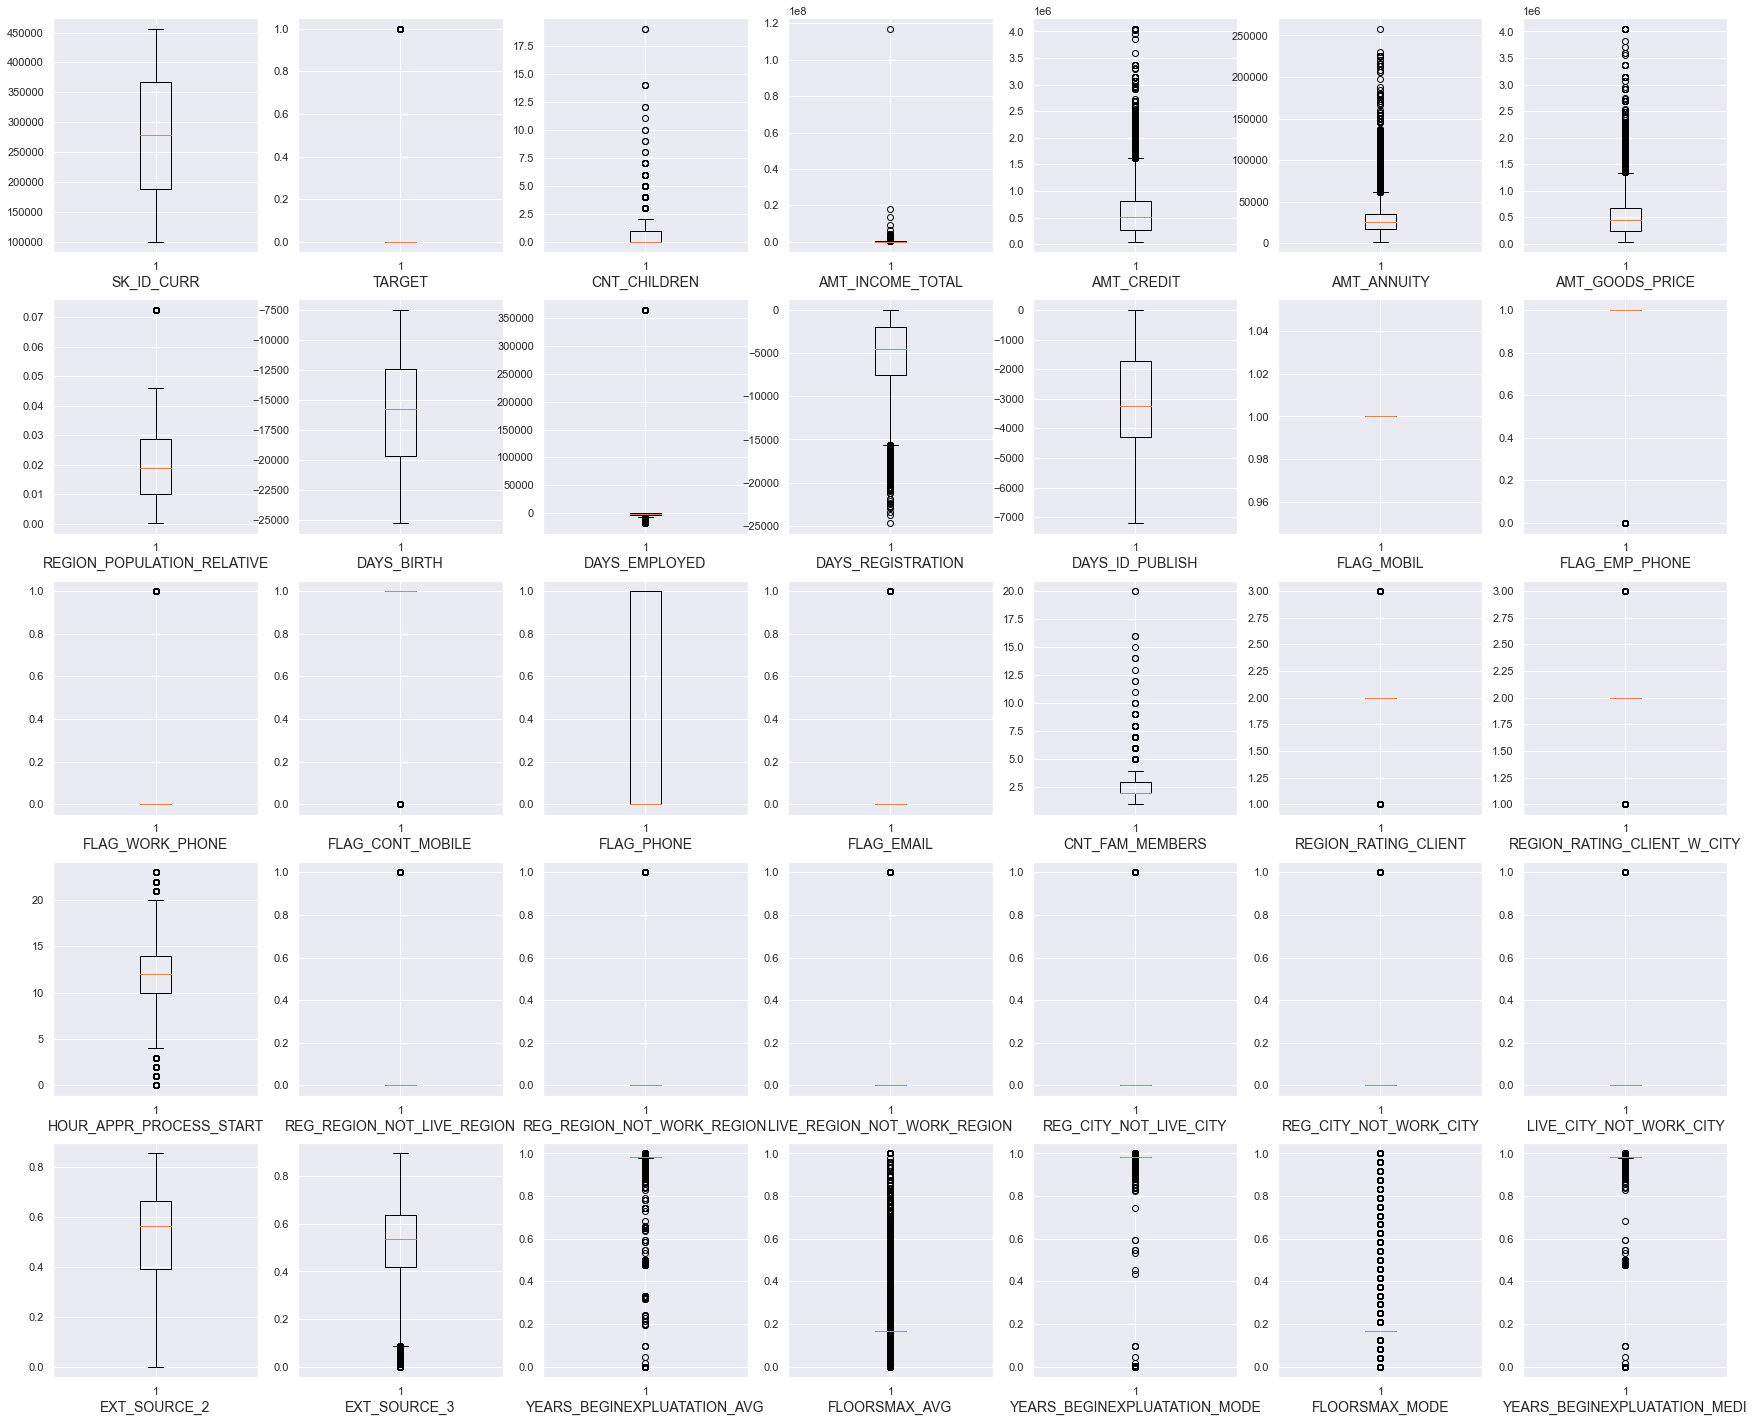

In [10]:
plt.figure(figsize=(30, 25))
col = 1

for i in data1.columns:
    if data1[i].dtype == "object":
        continue
    elif col<36:
        plt.subplot(5, 7, col)
        plt.boxplot(data1[i])
        plt.xlabel(i, y=-0.1, fontsize=14)
    col=col+1

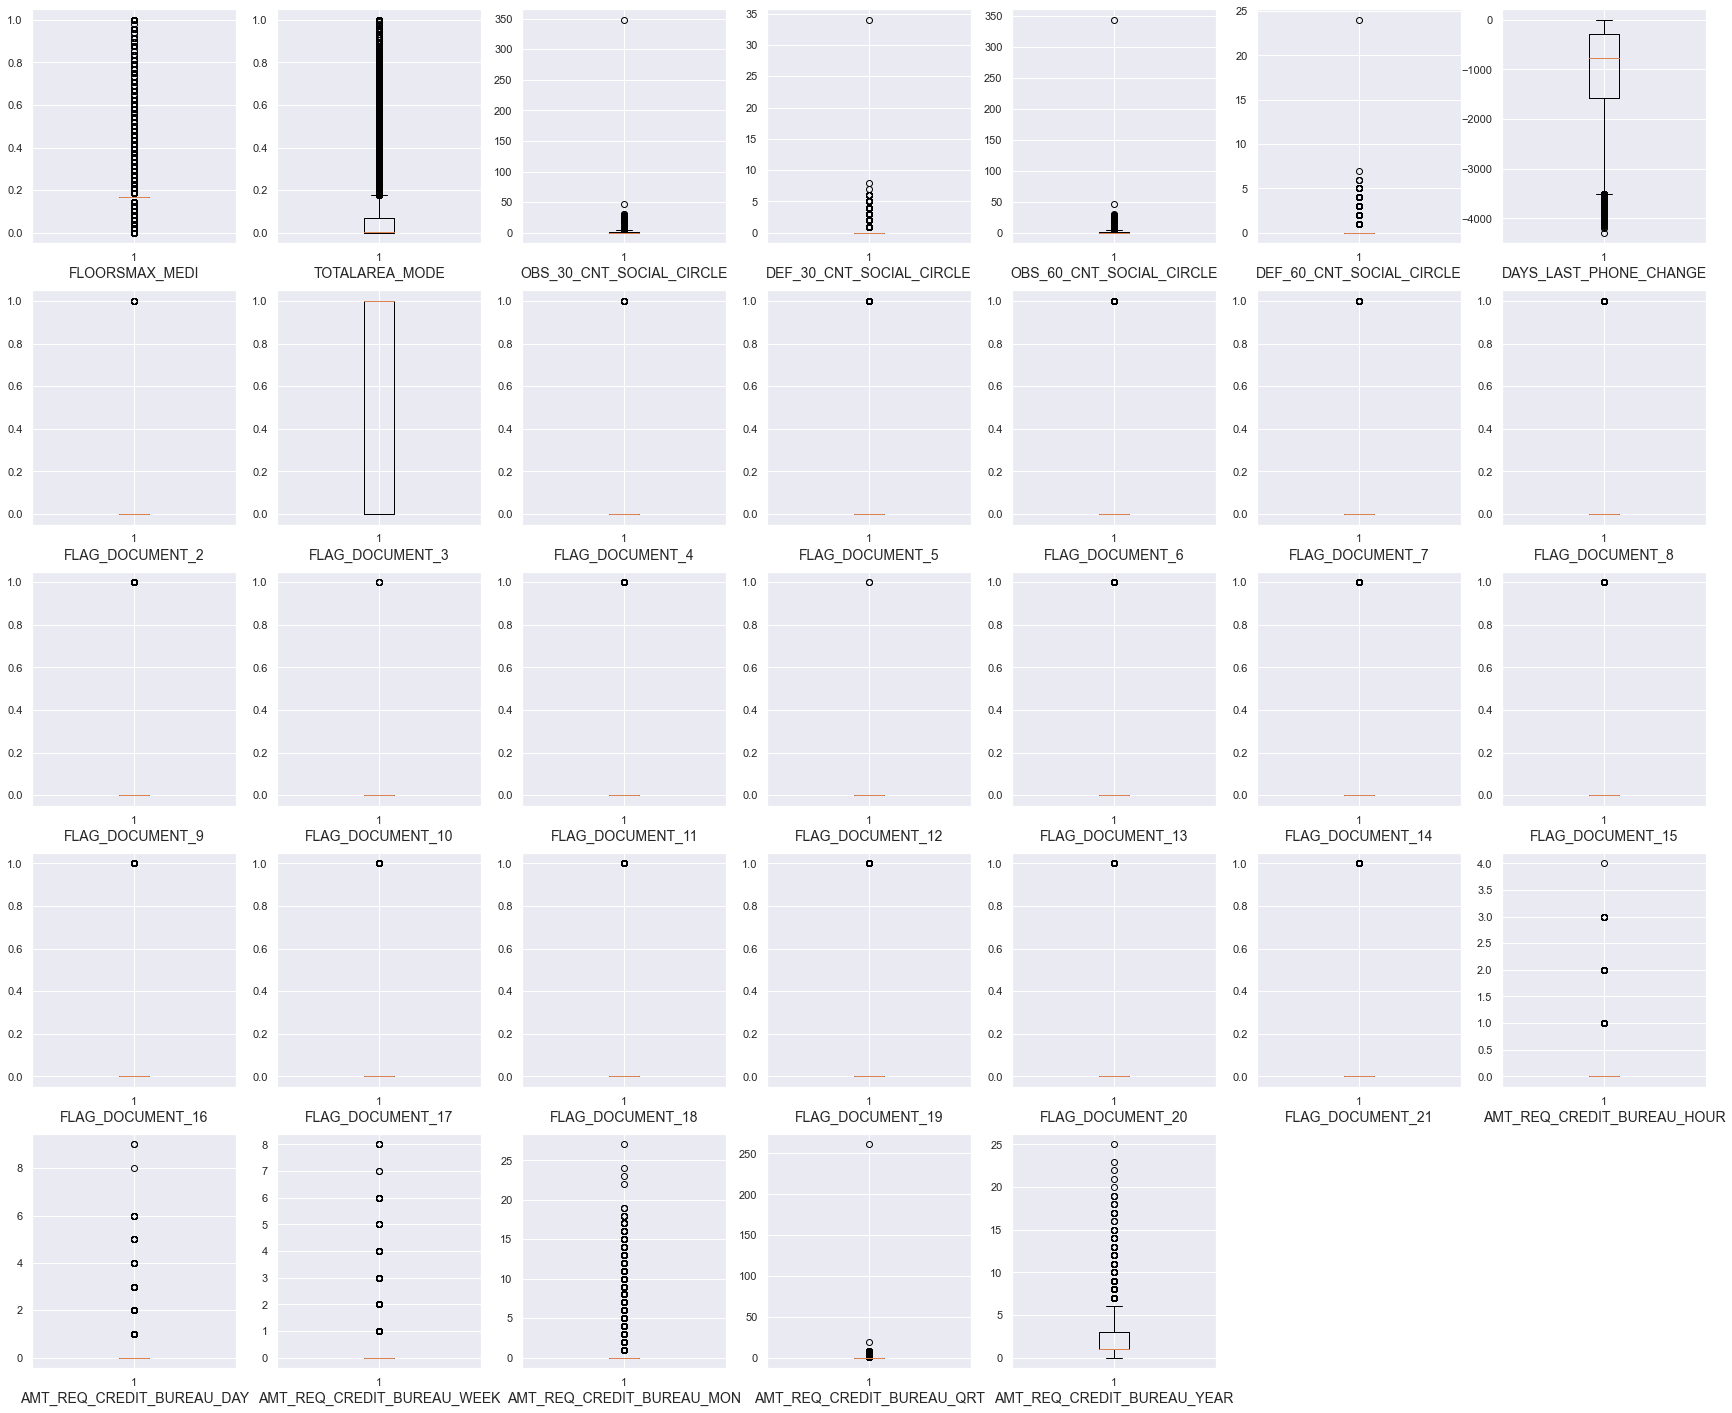

In [11]:
plt.figure(figsize=(30, 25))
col = 1

for i in data1.columns[47:]:
    if data1[i].dtype == "object":
        continue
    elif col<36:
        plt.subplot(5, 7, col)
        plt.boxplot(data1[i])
        plt.xlabel(i, y=-0.1, fontsize=14)
    col=col+1

In [ ]:
data1.to_csv("final_application_data.csv", index=False)

# Columns Description

## Load the Data

In [2]:
data2 = pd.read_csv("columns_description.csv", encoding='cp1252')
data2.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


### Number of Rows and Columns

In [3]:
data2.shape

(160, 5)

## Data Cleaning

### Checking for missing values

In [4]:
data2.isna().sum()

Unnamed: 0      0
Table           0
Row             0
Description     0
Special        91
dtype: int64

### Dealing with missing values

In [5]:
# Replacing the missing data with 'hashed'

data2.loc[(0), "Special"] = "hashed"

In [6]:
# Replacing the missing data with 'time only relative to the application'

data2.loc[(1,21), "Special"] = "time only relative to the application"
data2.loc[91:95, "Special"] = "time only relative to the application"
data2.loc[116:121, "Special"] = "time only relative to the application"

In [7]:
# Replacing the missing data with 'grouped'

data2.loc[2:6, "Special"] = "grouped"  
data2.loc[11:15, "Special"] = "grouped"
data2.loc[22:27, "Special"] = "grouped"
data2.loc[28:31, "Special"] = "grouped"
data2.loc[34:40, "Special"] = "grouped"
data2.loc[96:115, "Special"] = "grouped"
data2.loc[132:134, "Special"] = "grouped"
data2.loc[141:151, "Special"] = "grouped"
data2.loc[(124,138,139,153,159), "Special"] = "grouped"

In [8]:
# Replacing the missing data with 'normalized'

data2.loc[16, "Special"] = "normalized"
data2.loc[7:10, "Special"] = "normalized"
data2.loc[125:129, "Special"] = "normalized"

In [9]:
# Replacing the missing data with 'rounded'

data2.loc[(32,130), "Special"] = "rounded"

In [ ]:
data2.to_csv("final_columns_description.csv", index=False)

# Previous Application

## Load the Data

In [2]:
data3 = pd.read_csv("previous_application.csv")
data3.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Number of Rows and Columns

In [3]:
data3.shape

(1670214, 37)

### Splitting the Data into two

In [ ]:
df1 = data3[:800000]

In [ ]:
df2 = data3[800000:]

In [ ]:
df1.to_csv("previous_application_part1.csv", index=False)

In [ ]:
df2.to_csv("previous_application_part2.csv", index=False)

# Previous Application Part1

## Load the Data

In [2]:
d1 = pd.read_csv("previous_application_part1.csv")
d1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Number of Rows and Columns

In [3]:
d1.shape

(800000, 37)

## Data Cleaning

### Checking for missing values

In [4]:
d1.isna().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    177020
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_DOWN_PAYMENT               424076
AMT_GOODS_PRICE                182875
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT              424076
RATE_INTEREST_PRIMARY          797167
RATE_INTEREST_PRIVILEGED       797167
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                392662
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_

In [5]:
c = 0
t = 0

for i in d1.columns:
    if d1[i].isna().sum():
        c += 1    
        t += d1[i].isna().sum()
        
print ("Total columns having missing values:", c)
print ("Total missing values:", t)

Total columns having missing values: 15
Total missing values: 5291412


### Dealing with missing values

In [6]:
for i in d1.columns:
    if d1[i].isna().sum()>1:
        if (d1[i].isna().sum()/d1.shape[0]*100)<5:
            d1 = d1.dropna(subset=[i], axis=0)    

Removing missing data from these columns:
- PRODUCT_COMBINATION

In [7]:
for i in d1.columns:
    if (d1[i].isnull().sum()/d1.shape[0])*100>50:
        d1.drop(columns=[i], inplace=True)

Removing columns that have more the 50% missing data:
- AMT_DOWN_PAYMENT
- RATE_DOWN_PAYMENT
- RATE_INTEREST_PRIMARY
- RATE_INTEREST_PRIVILEGED

In [8]:
# Replacing the missing data with Mode

mod = ["NAME_TYPE_SUITE", "DAYS_FIRST_DUE", "DAYS_LAST_DUE_1ST_VERSION", "DAYS_LAST_DUE", "DAYS_TERMINATION"]

for i in mod:
    d1[i].fillna(d1[i].mode()[0], inplace=True)

Replacing the null values with mode in these columns:
- NAME_TYPE_SUITE
- DAYS_FIRST_DUE
- DAYS_LAST_DUE_1ST_VERSION
- DAYS_LAST_DUE
- DAYS_TERMINATION

In [9]:
# Replacing the missing data with Median

for i in d1:
    if d1[i].isna().sum()>0:
        d1[i].fillna(d1[i].median(), inplace=True)

Replacing the null values with median in these columns:
- AMT_ANNUITY
- AMT_GOODS_PRICE
- CNT_PAYMENT
- DAYS_FIRST_DRAWING
- NFLAG_INSURED_ON_APPROVAL

## Detecting Outliers

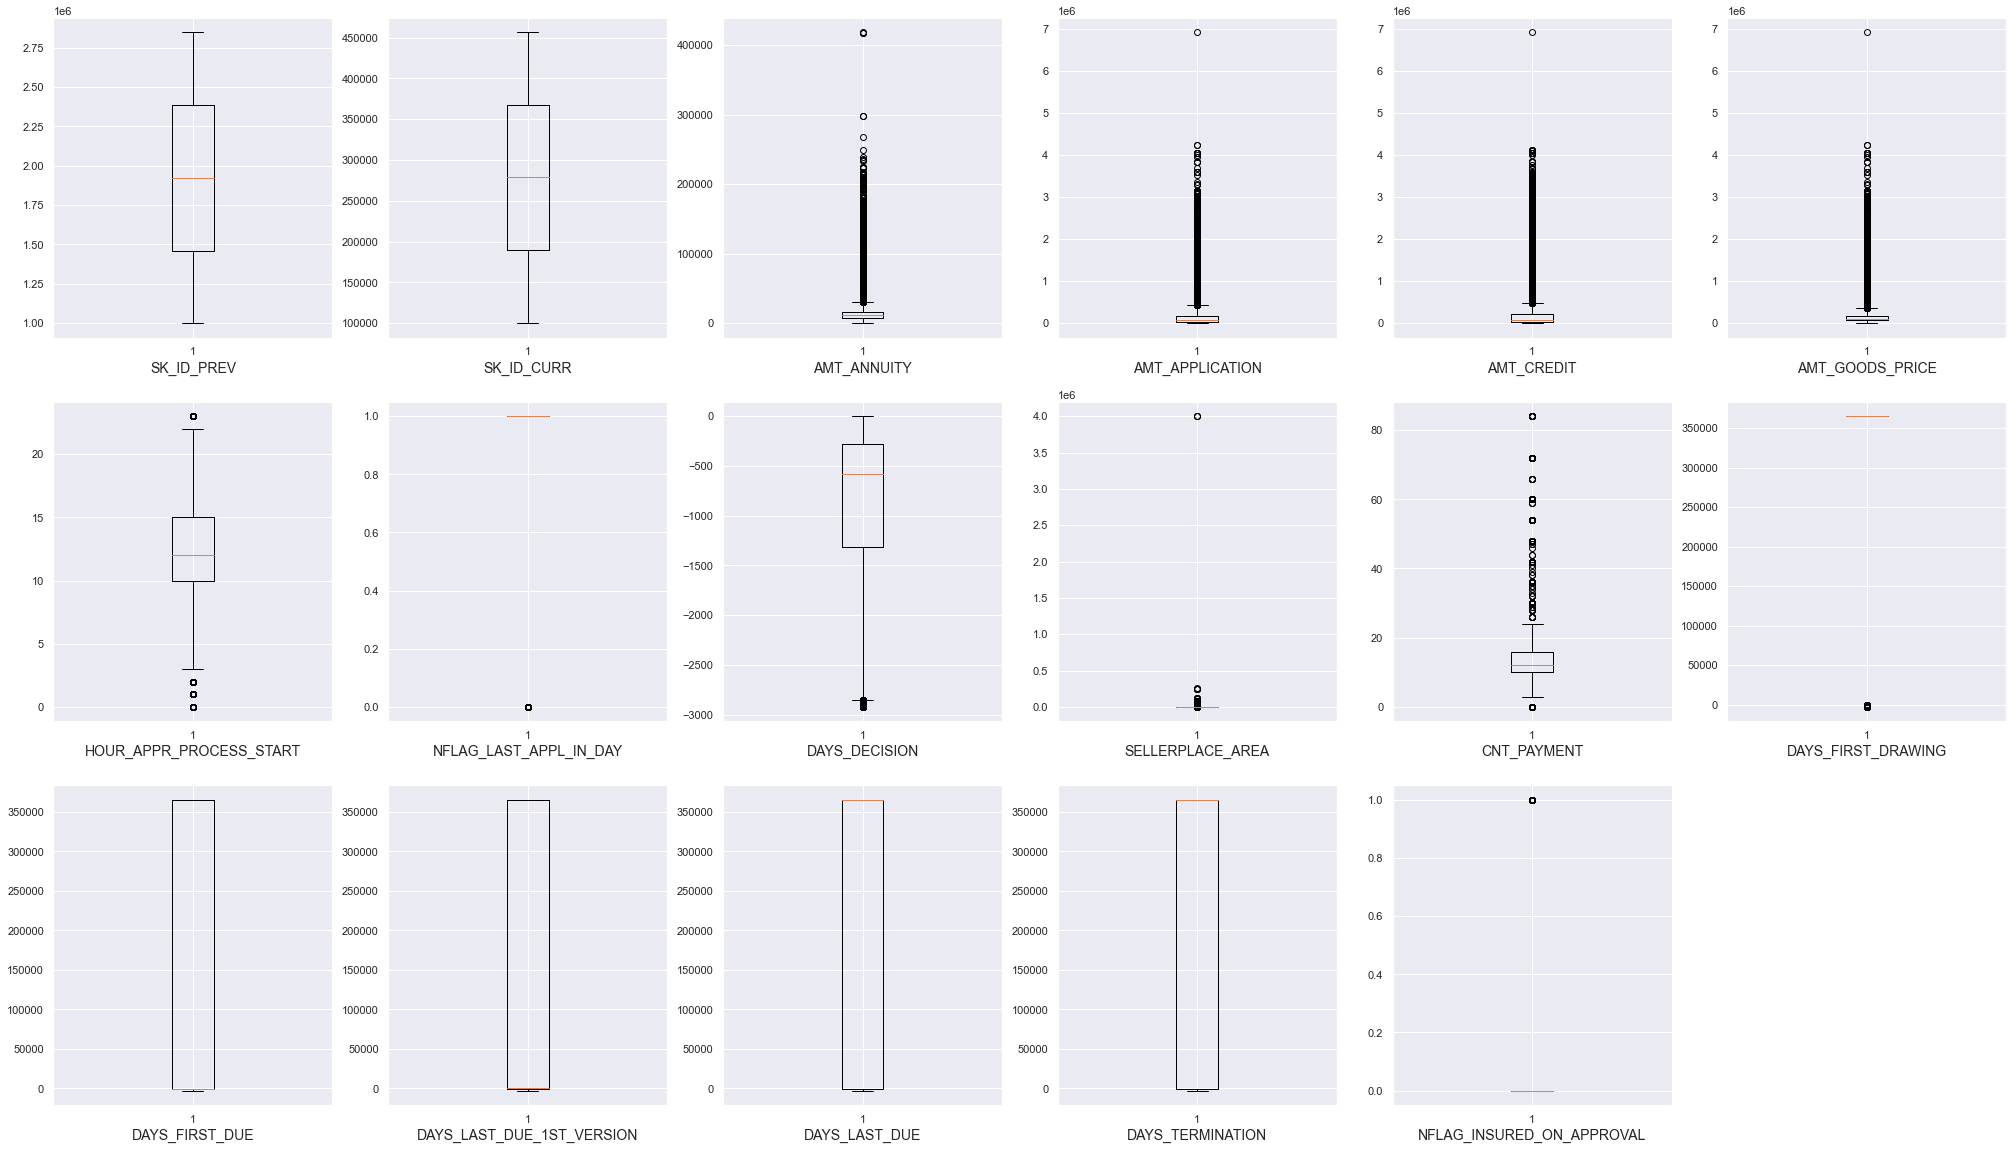

In [12]:
plt.figure(figsize=(35, 20))
col = 1

for i in d1.columns:
    if d1[i].dtype == "object":
        continue
    elif col<20:
        plt.subplot(3, 6, col)
        plt.boxplot(d1[i])
        plt.xlabel(i, y=-0.1, fontsize=14)
    col=col+1

In [11]:
d1.shape

(799844, 33)

In [13]:
d1.to_csv("final_previous_application_part1.csv", index=False)

# Previous Application Part1

## Load the Data

In [12]:
d2 = pd.read_csv("previous_application_part2.csv")
d2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1331771,320576,Consumer loans,3906.90,32980.5,32584.5,3330.0,32980.5,SUNDAY,10,...,Connectivity,12.0,high,POS mobile with interest,365243.0,-1663.0,-1333.0,-1333.0,-1326.0,0.0
1,1799496,395630,Consumer loans,20193.30,224370.0,179496.0,44874.0,224370.0,SATURDAY,9,...,Consumer electronics,10.0,low_normal,POS household without interest,NaN,NaN,NaN,NaN,NaN,NaN
2,2546401,407494,Consumer loans,10207.53,116347.5,104692.5,11655.0,116347.5,TUESDAY,13,...,Furniture,12.0,middle,POS industry with interest,365243.0,-2300.0,-1970.0,-1970.0,-1967.0,0.0
3,1832500,355426,Consumer loans,10273.23,72225.0,78183.0,0.0,72225.0,SUNDAY,13,...,Consumer electronics,10.0,high,POS household with interest,365243.0,-2359.0,-2089.0,-2239.0,-2229.0,1.0
4,2016320,250747,Consumer loans,4372.56,26325.0,22905.0,4500.0,26325.0,SATURDAY,11,...,Industry,6.0,middle,POS industry with interest,365243.0,-1832.0,-1682.0,-1682.0,-1677.0,0.0


### Number of Rows and Columns

In [13]:
d2.shape

(870214, 37)

## Data Cleaning

### Checking for missing values

In [14]:
d2.isna().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    195215
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_DOWN_PAYMENT               471768
AMT_GOODS_PRICE                202640
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT              471768
RATE_INTEREST_PRIMARY          867096
RATE_INTEREST_PRIVILEGED       867096
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                427743
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_

In [15]:
c = 0
t = 0

for i in d2.columns:
    if d2[i].isna().sum():
        c += 1    
        t += d2[i].isna().sum()
        
print ("Total columns having missing values:", c)
print ("Total missing values:", t)

Total columns having missing values: 16
Total missing values: 5817924


### Dealing with missing values

In [16]:
for i in d2.columns:
    if d2[i].isna().sum()>1:
        if (d2[i].isna().sum()/d2.shape[0]*100)<5:
            d2 = d2.dropna(subset=[i], axis=0) 

Removing missing data from these columns:
- PRODUCT_COMBINATION

In [17]:
for i in d2.columns:
    if (d2[i].isnull().sum()/d2.shape[0])*100>50:
        d2.drop(columns=[i], inplace=True)

Removing columns that have more the 50% missing data:
- AMT_DOWN_PAYMENT
- RATE_DOWN_PAYMENT
- RATE_INTEREST_PRIMARY
- RATE_INTEREST_PRIVILEGED

In [18]:
# Replacing the missing data with Mode

mod = ["NAME_TYPE_SUITE", "DAYS_FIRST_DUE", "DAYS_LAST_DUE_1ST_VERSION", "DAYS_LAST_DUE", "DAYS_TERMINATION"]

for i in mod:
    d2[i].fillna(d2[i].mode()[0], inplace=True)

Replacing the null values with mode in these columns:
- NAME_TYPE_SUITE
- DAYS_FIRST_DUE
- DAYS_LAST_DUE_1ST_VERSION
- DAYS_LAST_DUE
- DAYS_TERMINATION

In [19]:
# Replacing the missing data with Median

for i in d2:
    if d2[i].isna().sum()>0:
        d2[i].fillna(d2[i].median(), inplace=True)

Replacing the null values with median in these columns:
- AMT_ANNUITY
- AMT_CREDIT
- AMT_GOODS_PRICE
- CNT_PAYMENT
- DAYS_FIRST_DRAWING
- NFLAG_INSURED_ON_APPROVAL

## Detecting Outliers

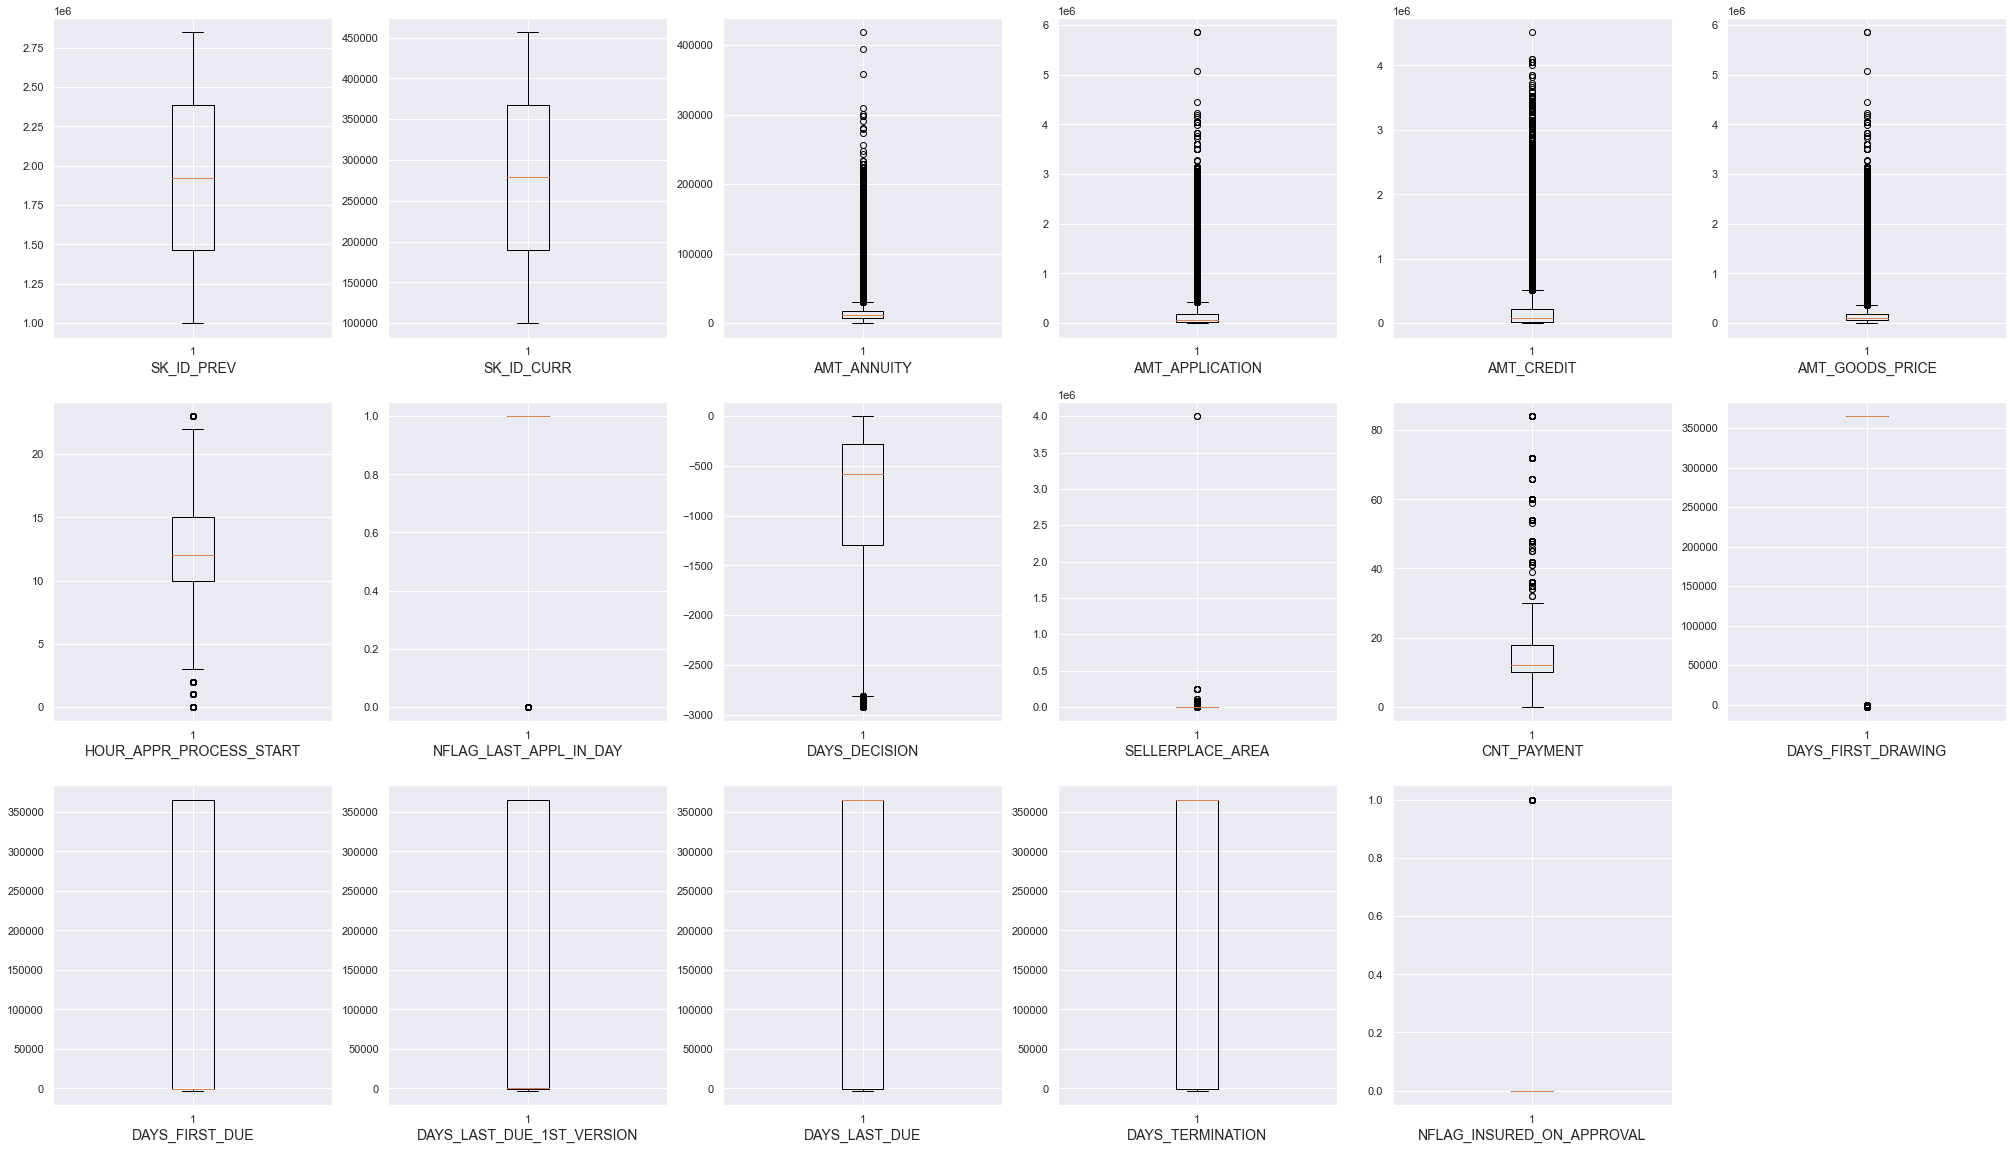

In [10]:
plt.figure(figsize=(35, 20))
col = 1

for i in d2.columns:
    if d2[i].dtype == "object":
        continue
    elif col<20:
        plt.subplot(3, 6, col)
        plt.boxplot(d2[i])
        plt.xlabel(i, y=-0.1, fontsize=14)
    col=col+1

In [20]:
d2.shape

(870024, 33)

In [11]:
d2.to_csv("final_previous_application_part2.csv", index=False)